In [1]:
import json, requests, pprint, os

BASE_URL = "http://127.0.0.1:8000"  # sem /monitor
BATCH_PATH = r"C:\Users\liliz\Downloads\Desafio Neurotech\monitoramento-ml\monitoring\batch_records.json"

TRAIN_PATH = r"C:\Users\liliz\Downloads\Desafio Neurotech\monitoramento-ml\challenge-data-scientist\datasets\credit_01\train.gz"
OOT_PATH   = r"C:\Users\liliz\Downloads\Desafio Neurotech\monitoramento-ml\challenge-data-scientist\datasets\credit_01\oot.gz"

print("Arquivos existem?", os.path.exists(BATCH_PATH), os.path.exists(TRAIN_PATH), os.path.exists(OOT_PATH))


Arquivos existem? True True True


In [2]:
with open(BATCH_PATH, "r", encoding="utf-8") as f:
    data = json.load(f)

records = data if isinstance(data, list) else data.get("records", [])
print("Qtde de registros lidos:", len(records))
print("Primeiro registro:")
pprint.pp(records[0])


Qtde de registros lidos: 500
Primeiro registro:
{'VAR2': 'M',
 'IDADE': 43.893,
 'VAR5': 'PR',
 'VAR6': -25.4955709,
 'VAR7': -49.2454987,
 'VAR8': 'D',
 'VAR9': 'E',
 'VAR10': 'MEDIA',
 'VAR11': 1.0,
 'VAR12': 0.182,
 'VAR14': 0.597,
 'VAR15': 0.618,
 'VAR16': 0.25,
 'VAR18': 1.076712,
 'VAR19': 5.057534,
 'VAR22': 0.125,
 'VAR24': 0.069,
 'VAR25': 0.0969999999999999,
 'VAR32': 'SALDO INEXISTENTE',
 'VAR39': 0.661039,
 'VAR40': 0.573539,
 'VAR41': 0.4793699999999999,
 'VAR42': 0.4440489999999999,
 'VAR47': 0.006,
 'VAR49': 'S',
 'VAR50': 'N',
 'VAR51': 'N',
 'VAR52': 'N',
 'VAR53': 'N',
 'VAR54': 'N',
 'VAR55': 'N',
 'VAR56': 'S',
 'VAR57': 'S',
 'VAR58': 'N',
 'VAR59': 'N',
 'VAR60': 'N',
 'VAR61': 'N',
 'VAR62': 'N',
 'VAR63': 'N',
 'VAR64': 'N',
 'VAR65': 'N',
 'VAR66': 'ALTISSIMA',
 'VAR67': 'ALTA',
 'VAR68': 'ALTISSIMA',
 'VAR69': 'ALTISSIMA',
 'VAR70': 'ALTISSIMA',
 'VAR71': 'ALTA',
 'VAR72': 'ALTISSIMA',
 'VAR73': 'ALTISSIMA',
 'VAR74': 'ALTISSIMA',
 'VAR75': 'ALTISSIMA',
 'VAR

In [3]:
payload = {"records": records}  # se quiser testar menor: {"records": records[:200]}

url = f"{BASE_URL}/performance"
resp = requests.post(url, json=payload, timeout=180)
print("URL:", url)
print("STATUS:", resp.status_code)
pprint.pp(resp.json())


URL: http://127.0.0.1:8000/performance
STATUS: 200
{'volumetry_by_month': {'2017-01': 58,
                        '2017-02': 55,
                        '2017-03': 62,
                        '2017-04': 49,
                        '2017-05': 67,
                        '2017-06': 63,
                        '2017-07': 74,
                        '2017-08': 72},
 'roc_auc': 0.575175,
 'n_records': 500}


In [4]:
from pathlib import Path
print("TRAIN existe? ", Path(TRAIN_PATH).exists(), TRAIN_PATH)
print("OOT   existe? ", Path(OOT_PATH).exists(),   OOT_PATH)


TRAIN existe?  True C:\Users\liliz\Downloads\Desafio Neurotech\monitoramento-ml\challenge-data-scientist\datasets\credit_01\train.gz
OOT   existe?  True C:\Users\liliz\Downloads\Desafio Neurotech\monitoramento-ml\challenge-data-scientist\datasets\credit_01\oot.gz


In [5]:
# Célula 4
payload = {"dataset_path": TRAIN_PATH}
url = f"{BASE_URL}/adherence"
resp = requests.post(url, json=payload, timeout=300)
print("URL:", url); print("STATUS:", resp.status_code)
pprint.pp(resp.json())


URL: http://127.0.0.1:8000/adherence
STATUS: 200
{'impl_version': 'adherence-v9',
 'dataset_compared': 'C:\\Users\\liliz\\Downloads\\Desafio '
                     'Neurotech\\monitoramento-ml\\challenge-data-scientist\\datasets\\credit_01\\train.gz',
 'reference_dataset': 'C:\\Users\\liliz\\Downloads\\Desafio '
                      'Neurotech\\monitoramento-ml\\challenge-data-scientist\\datasets\\credit_01\\test.gz',
 'ks_statistic': 0.0016212583163695005,
 'p_value': 0.9999794393042257,
 'n_dataset': 120750,
 'n_reference': 51751,
 'used_features_sample': ['VAR2',
                          'IDADE',
                          'VAR5',
                          'VAR6',
                          'VAR7',
                          'VAR8',
                          'VAR9',
                          'VAR10',
                          'VAR11',
                          'VAR12',
                          '...']}


In [6]:
# Célula 5
payload = {"dataset_path": OOT_PATH}
url = f"{BASE_URL}/adherence"
resp = requests.post(url, json=payload, timeout=300)
print("URL:", url); print("STATUS:", resp.status_code)
pprint.pp(resp.json())

URL: http://127.0.0.1:8000/adherence
STATUS: 200
{'impl_version': 'adherence-v9',
 'dataset_compared': 'C:\\Users\\liliz\\Downloads\\Desafio '
                     'Neurotech\\monitoramento-ml\\challenge-data-scientist\\datasets\\credit_01\\oot.gz',
 'reference_dataset': 'C:\\Users\\liliz\\Downloads\\Desafio '
                      'Neurotech\\monitoramento-ml\\challenge-data-scientist\\datasets\\credit_01\\test.gz',
 'ks_statistic': 0.019660815699542145,
 'p_value': 1.498734461518826e-11,
 'n_dataset': 91965,
 'n_reference': 51751,
 'used_features_sample': ['VAR2',
                          'IDADE',
                          'VAR5',
                          'VAR6',
                          'VAR7',
                          'VAR8',
                          'VAR9',
                          'VAR10',
                          'VAR11',
                          'VAR12',
                          '...']}


In [7]:
from pathlib import Path
print(Path(TRAIN_PATH).exists(), TRAIN_PATH)
print(Path(OOT_PATH).exists(),   OOT_PATH)


True C:\Users\liliz\Downloads\Desafio Neurotech\monitoramento-ml\challenge-data-scientist\datasets\credit_01\train.gz
True C:\Users\liliz\Downloads\Desafio Neurotech\monitoramento-ml\challenge-data-scientist\datasets\credit_01\oot.gz


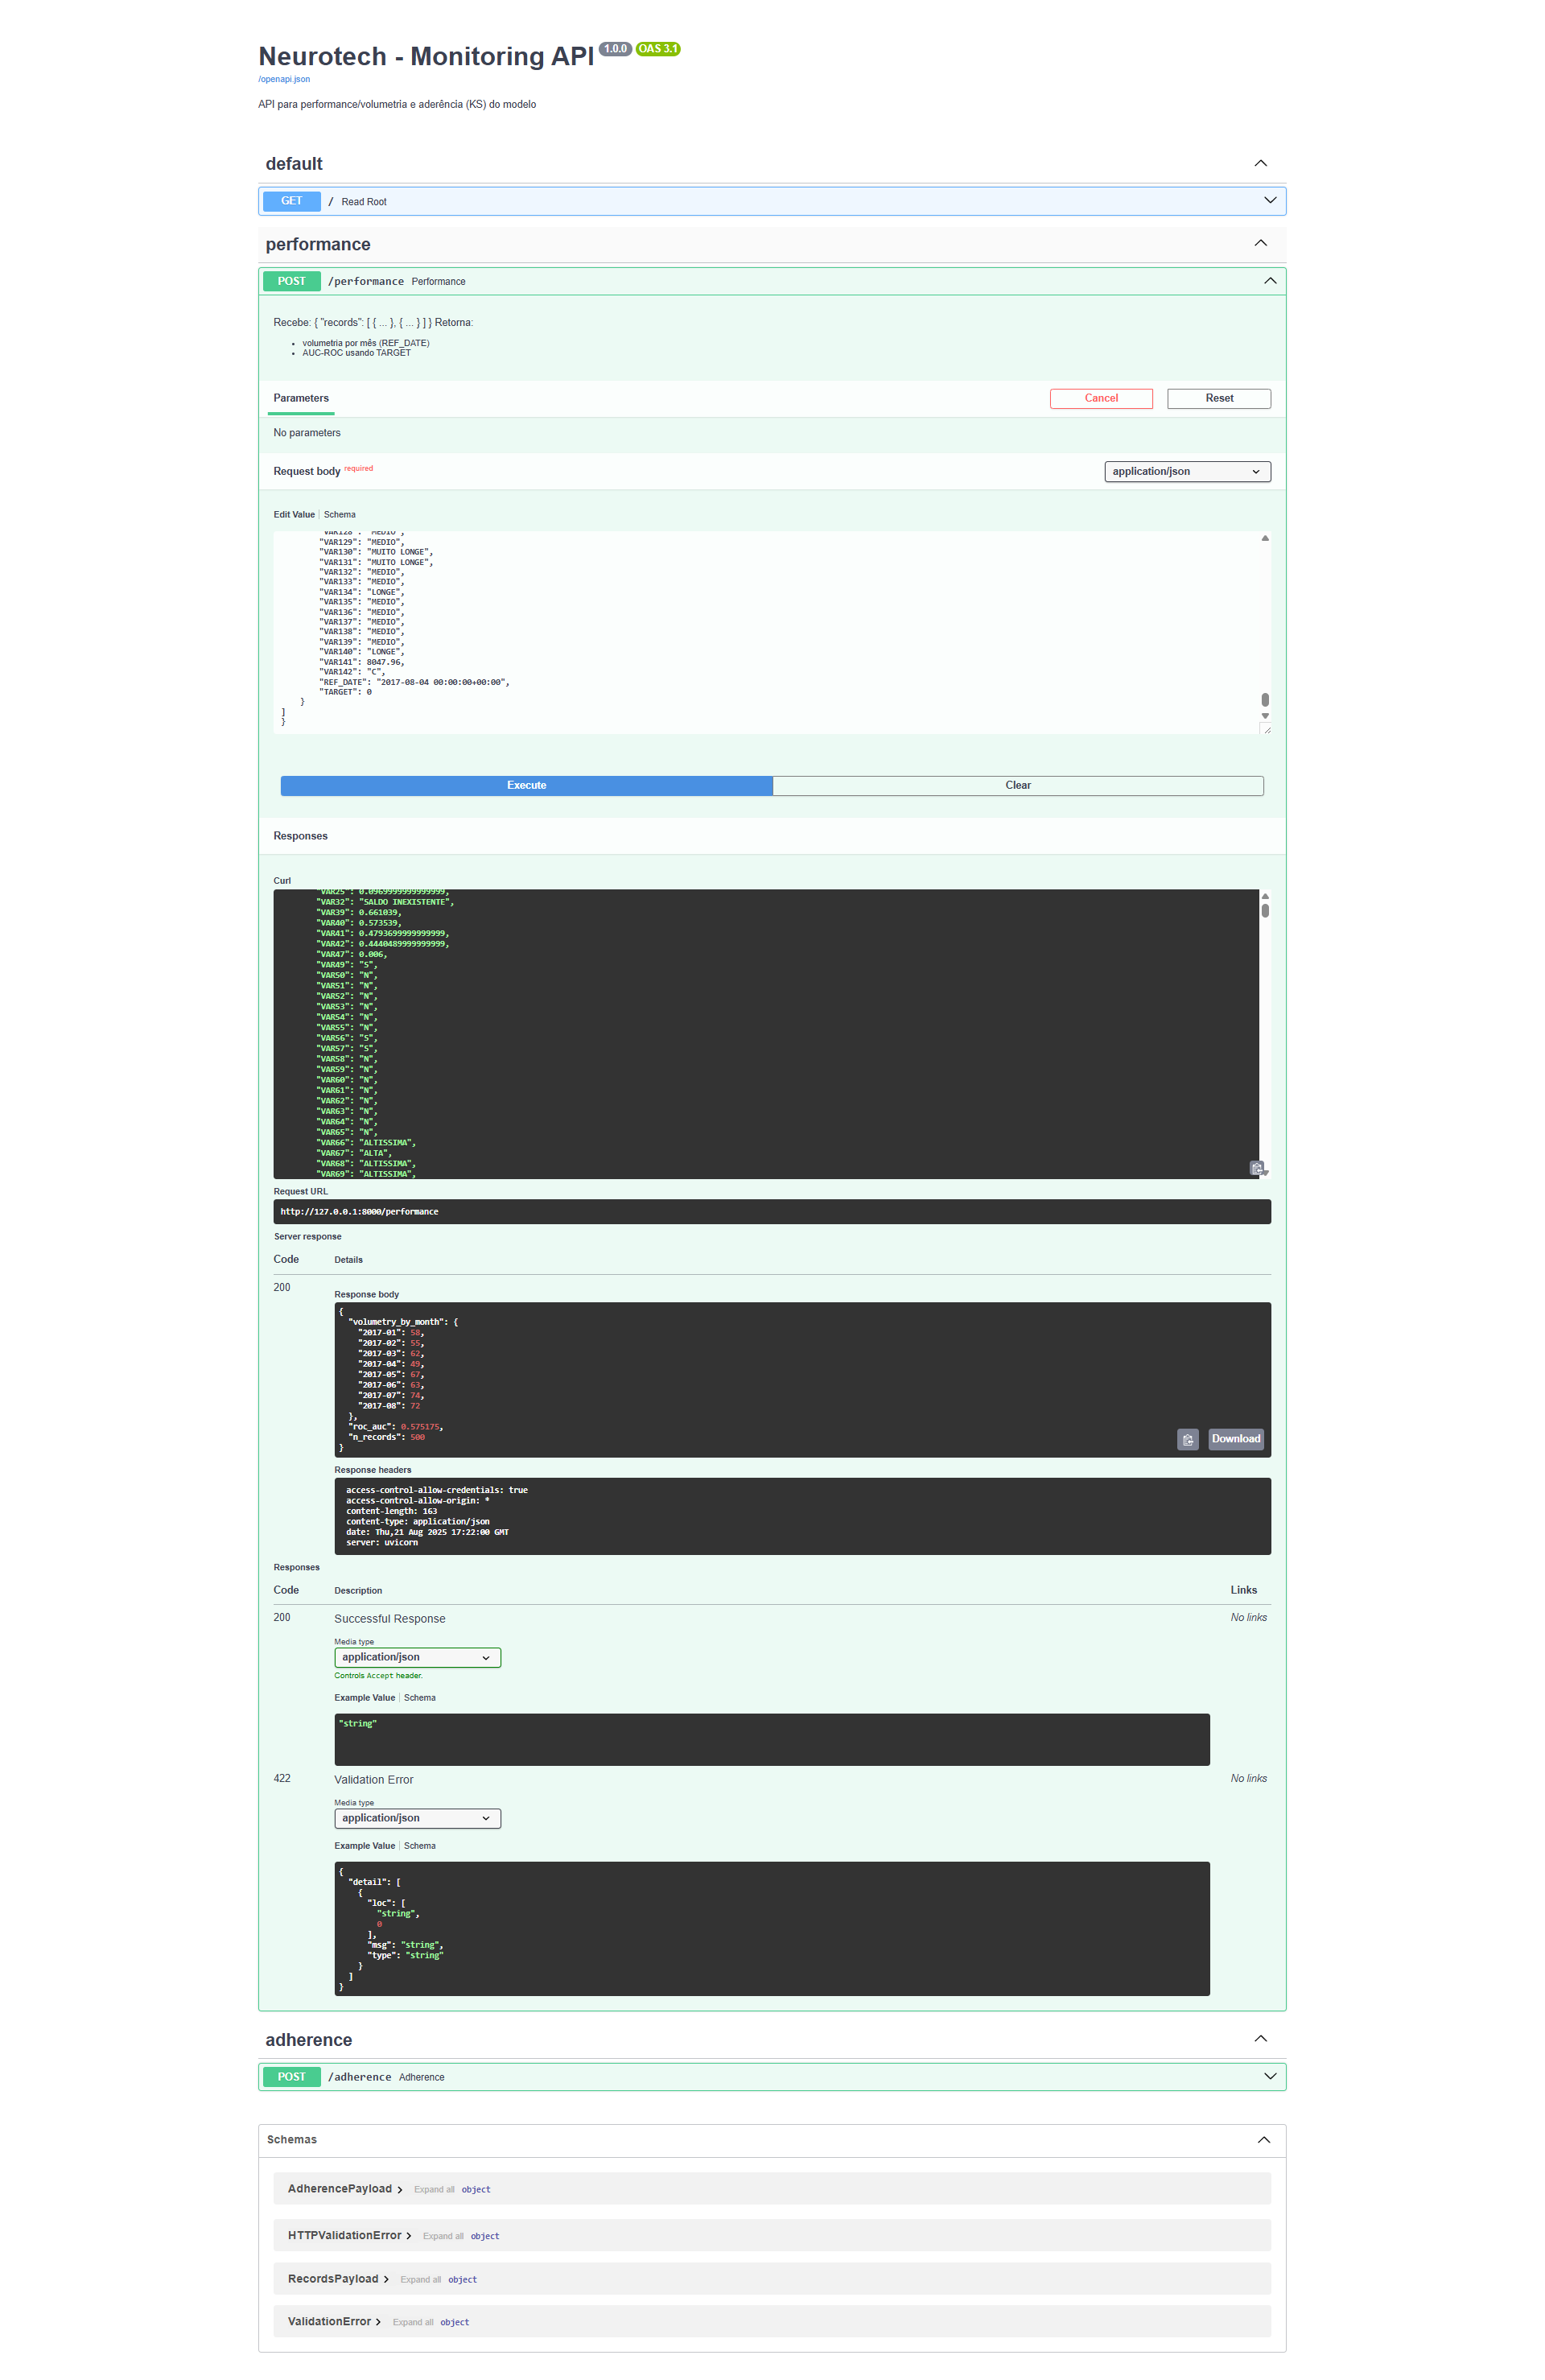

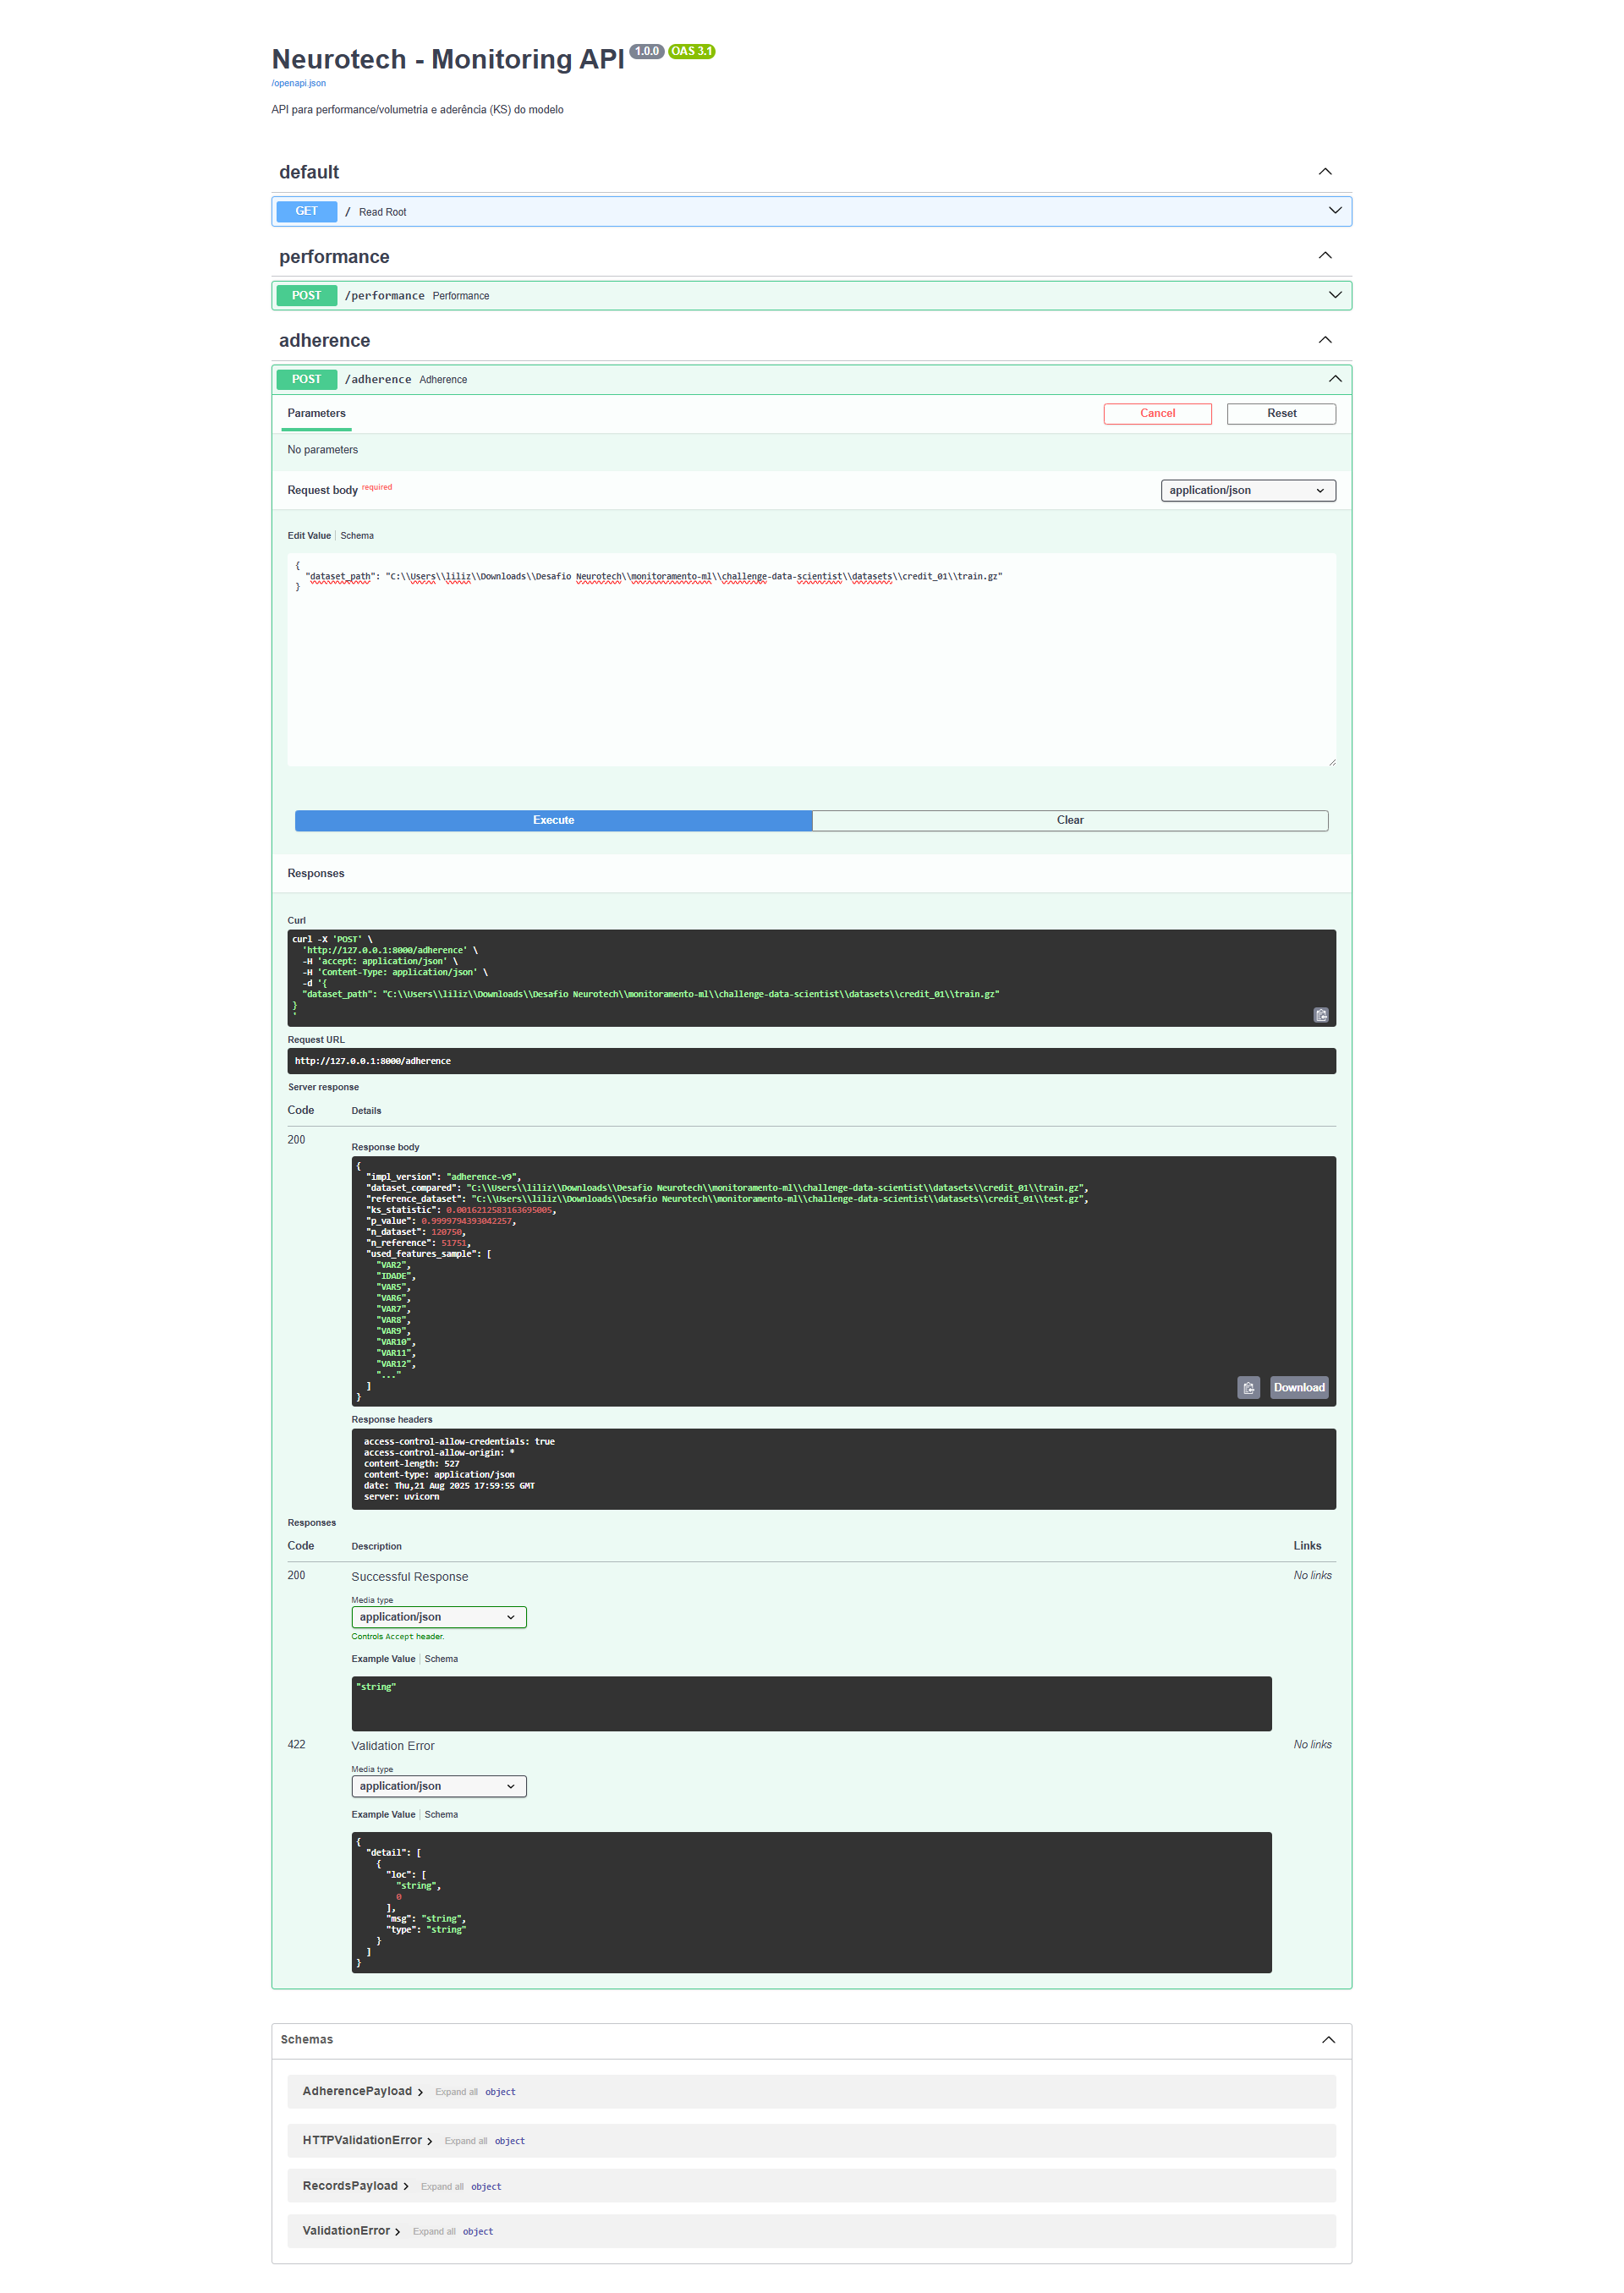

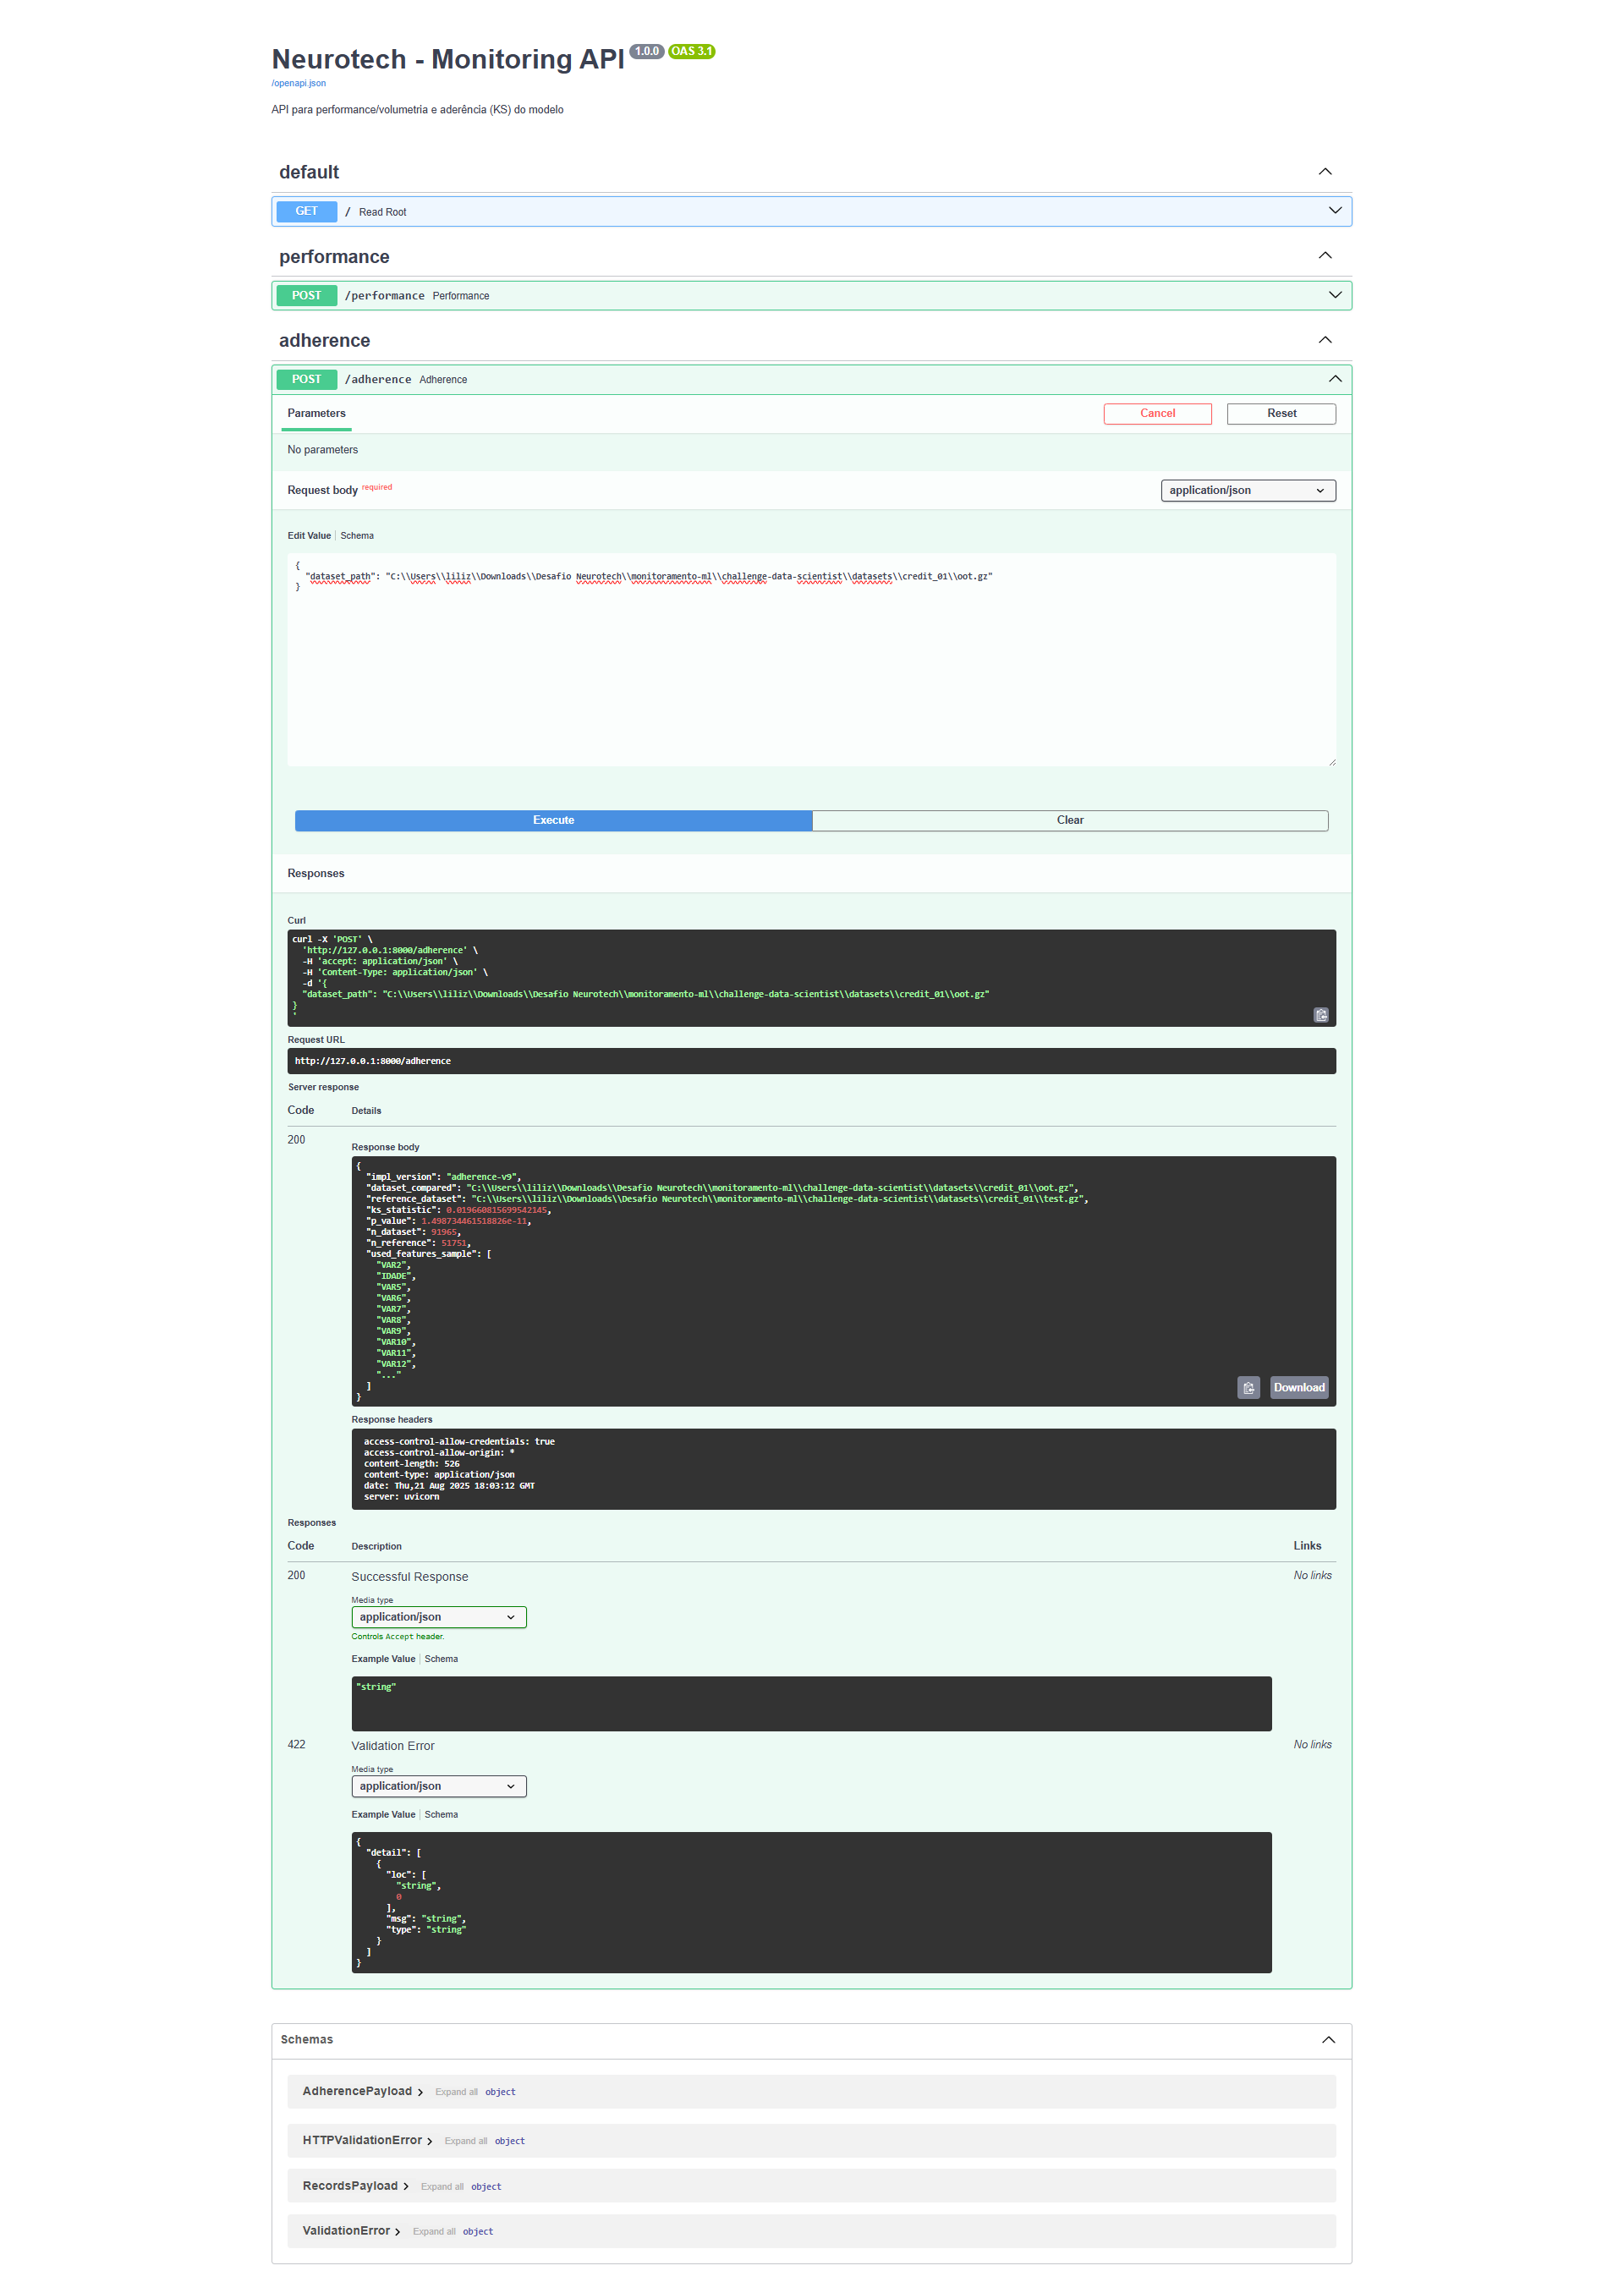